In [15]:
%pylab inline
%autosave 50

Populating the interactive namespace from numpy and matplotlib


Autosaving every 50 seconds



use_inf_as_null had been deprecated and will be removed in a future version.
Use `use_inf_as_na` instead.

  Ticker                                 OrderId0  \
0   aapl  aapl_-5958560290176504300_1546713852295   
1   goog  goog_-8595513625052144957_1546713852295   
2   aapl  aapl_-5958560290176504300_1546713852297   
3   goog  goog_-8595513625052144957_1546713852297   

                                  OrderId1  BuySell           EntryDate  \
0  aapl_-5958560290176504300_1546713852296       -1 2008-12-22 21:38:00   
1  goog_-8595513625052144957_1546713852296        1 2008-12-22 21:38:00   
2  aapl_-5958560290176504300_1546713852298       -1 2014-04-03 08:14:00   
3  goog_-8595513625052144957_1546713852298        1 2014-04-03 08:14:00   

   EntryPrice            ExitDate  ExitPrice    Pnl  Qty  MAE  MFE  
0      85.895 2008-12-22 21:39:00     85.905  -0.01    1    0    0  
1     297.155 2008-12-22 21:39:00    297.885   0.73    1    0    0  
2     542.995 2014-04-13 00:01:00    519.05

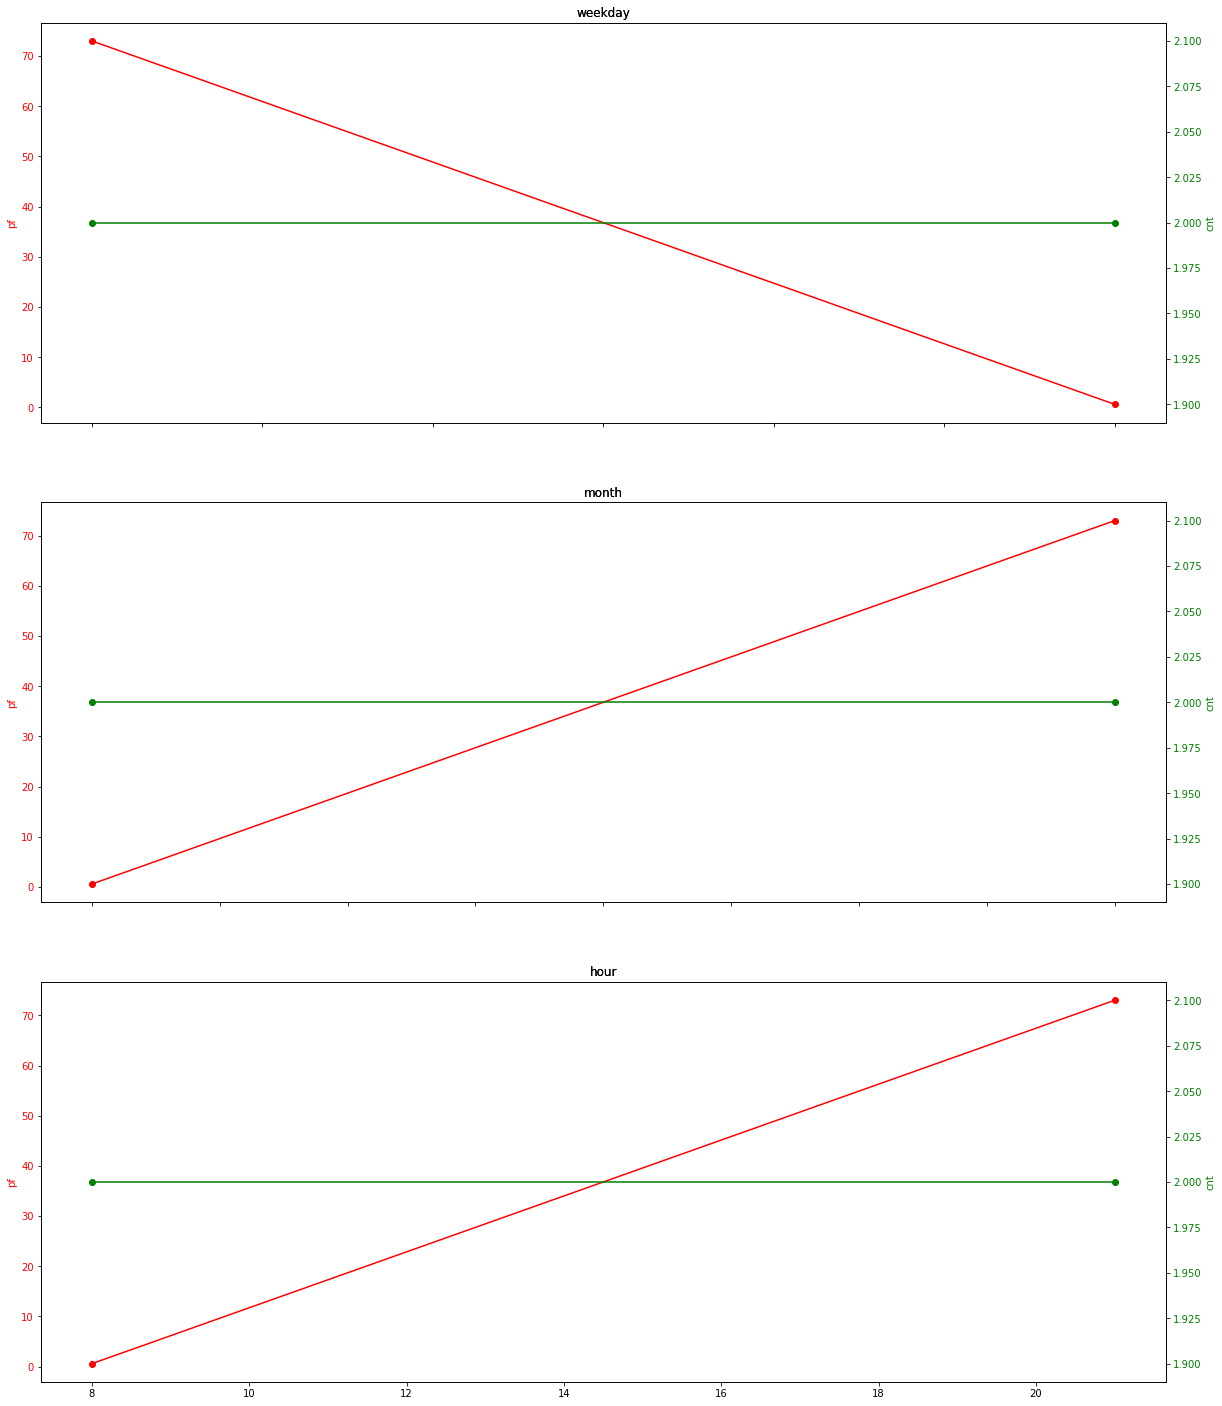

<module 'TradesReporter' from '/home/ivan/projects/fbackend/market_research/report/TradesReporter.py'>

In [16]:
import os
import TradesReporter as tr
import pandas as pd
from IPython.display import HTML
import json
import importlib
pd.set_option('notebook_repr_html',True)
pd.set_option('use_inf_as_null', True)
importlib.reload(tr)

In [17]:
root=os.getcwd()
with open(root + '/cfg.json') as data_file:    
    modelCfg = json.load(data_file)
simpleRun = True
# simpleRun=modelCfg['backtestMode']['name'] == 'SimpleRun'


In [18]:
modelProps=dict(line.strip().split('=') for line in open('modelProps.properties')) 
display(tr.displayTitle('Model params'))
display(HTML( pd.DataFrame(pd.Series(modelProps)).to_html()))

,0
period,10


  Ticker                                 OrderId0  \
0   aapl  aapl_-5958560290176504300_1546713852295   
1   goog  goog_-8595513625052144957_1546713852295   
2   aapl  aapl_-5958560290176504300_1546713852297   
3   goog  goog_-8595513625052144957_1546713852297   

                                  OrderId1  BuySell           EntryDate  \
0  aapl_-5958560290176504300_1546713852296       -1 2008-12-22 21:38:00   
1  goog_-8595513625052144957_1546713852296        1 2008-12-22 21:38:00   
2  aapl_-5958560290176504300_1546713852298       -1 2014-04-03 08:14:00   
3  goog_-8595513625052144957_1546713852298        1 2014-04-03 08:14:00   

   EntryPrice            ExitDate  ExitPrice    Pnl  Qty  MAE  MFE  
0      85.895 2008-12-22 21:39:00     85.905  -0.01    1    0    0  
1     297.155 2008-12-22 21:39:00    297.885   0.73    1    0    0  
2     542.995 2014-04-13 00:01:00    519.055  23.94    1    0    0  
3     570.005 2014-04-13 00:01:00    530.495 -39.51    1    0    0  


,buyStat,sellStat
HoldTimeMeanHours,115.900000,115.900000
HoldTimeMedianHours,115.900000,115.900000
cnt,2.000000,2.000000
max,0.730000,23.940000
mean,-19.390000,11.965000
median,-19.390000,11.965000
min,-39.510000,-0.010000
pf,0.018476,2394.000000
pl,-38.780000,23.930000
sharpe,-0.963718,0.999165


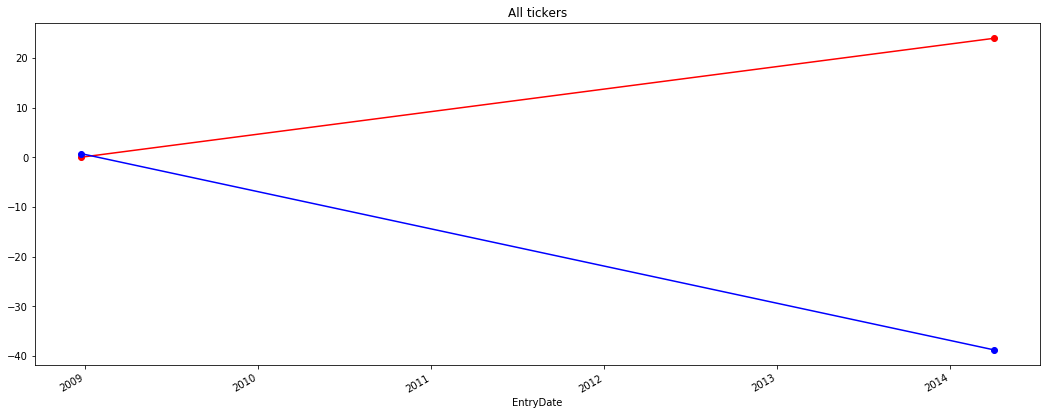

In [19]:
bs=tr.BacktestResults()
bs.load(root + '/trades.csv')
bs.trades
#bs.trades=bs.trades[bs.trades.atr < 3700]
#bs.trades=bs.trades[bs.trades.EntryDate.apply(lambda x: x.weekday() == 4)]
bs.plot_equity_d2d_for_ticker()
mc=tr.MetricsCalculator()
display(tr.displayTitle('Overall stat '))
mc.statToHtml(bs.trades)

/home/ivan/projects/fbackend/market_research/report/TradesReporter.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lambda x: x / np.timedelta64(1, 'h'))


,buyStat,sellStat
HoldTimeMeanHours,None,115.900000
HoldTimeMedianHours,None,115.900000
cnt,None,2.000000
max,None,23.940000
mean,None,11.965000
median,None,11.965000
min,None,-0.010000
pf,None,2394.000000
pl,None,23.930000
sharpe,None,0.999165


,buyStat,sellStat
HoldTimeMeanHours,115.900000,None
HoldTimeMedianHours,115.900000,None
cnt,2.000000,None
max,0.730000,None
mean,-19.390000,None
median,-19.390000,None
min,-39.510000,None
pf,0.018476,None
pl,-38.780000,None
sharpe,-0.963718,None


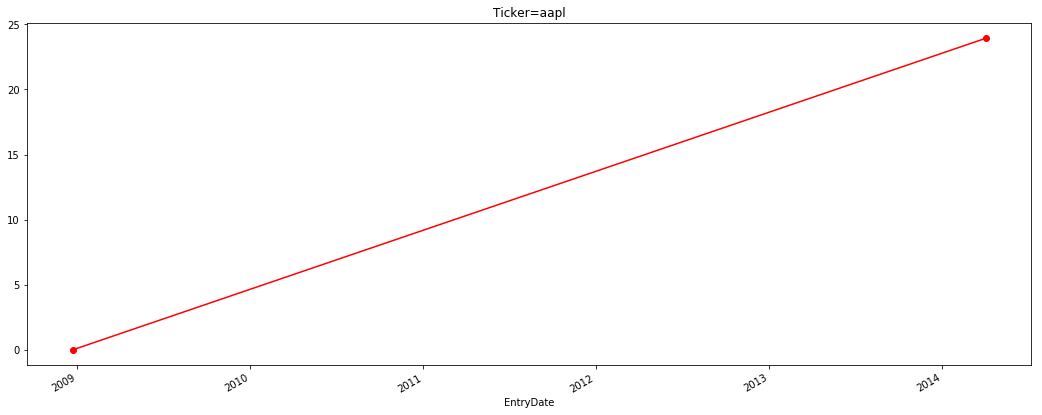

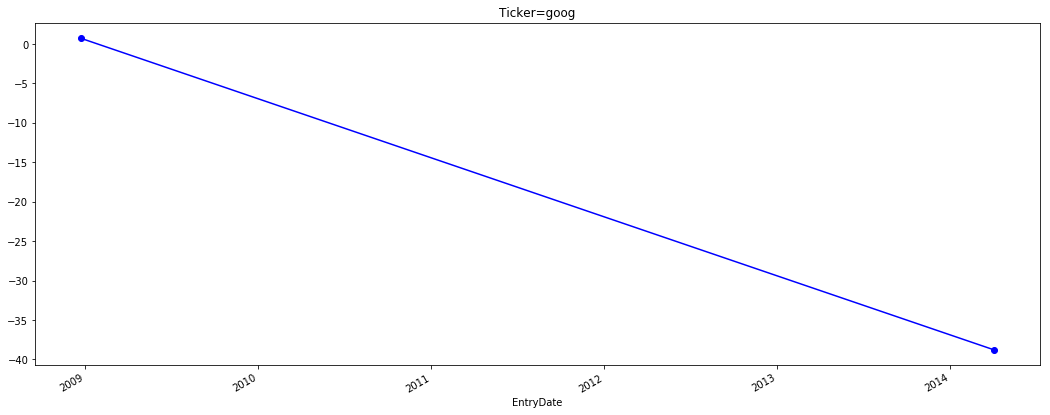

In [20]:
if len(bs.tickers()) > 1:
    for t in bs.tickers():
        bs.plot_equity_d2d_for_ticker(t)    
        display(tr.displayTitle('Stat for ' + t))
        display(mc.statToHtml(bs.trades[bs.trades.Ticker==t]))

In [21]:
display(tr.displayTitle('Pnl/Factors'))
bs.plotFactors() 

TypeError: 'float' object cannot be interpreted as an integer

<Figure size 432x288 with 0 Axes>

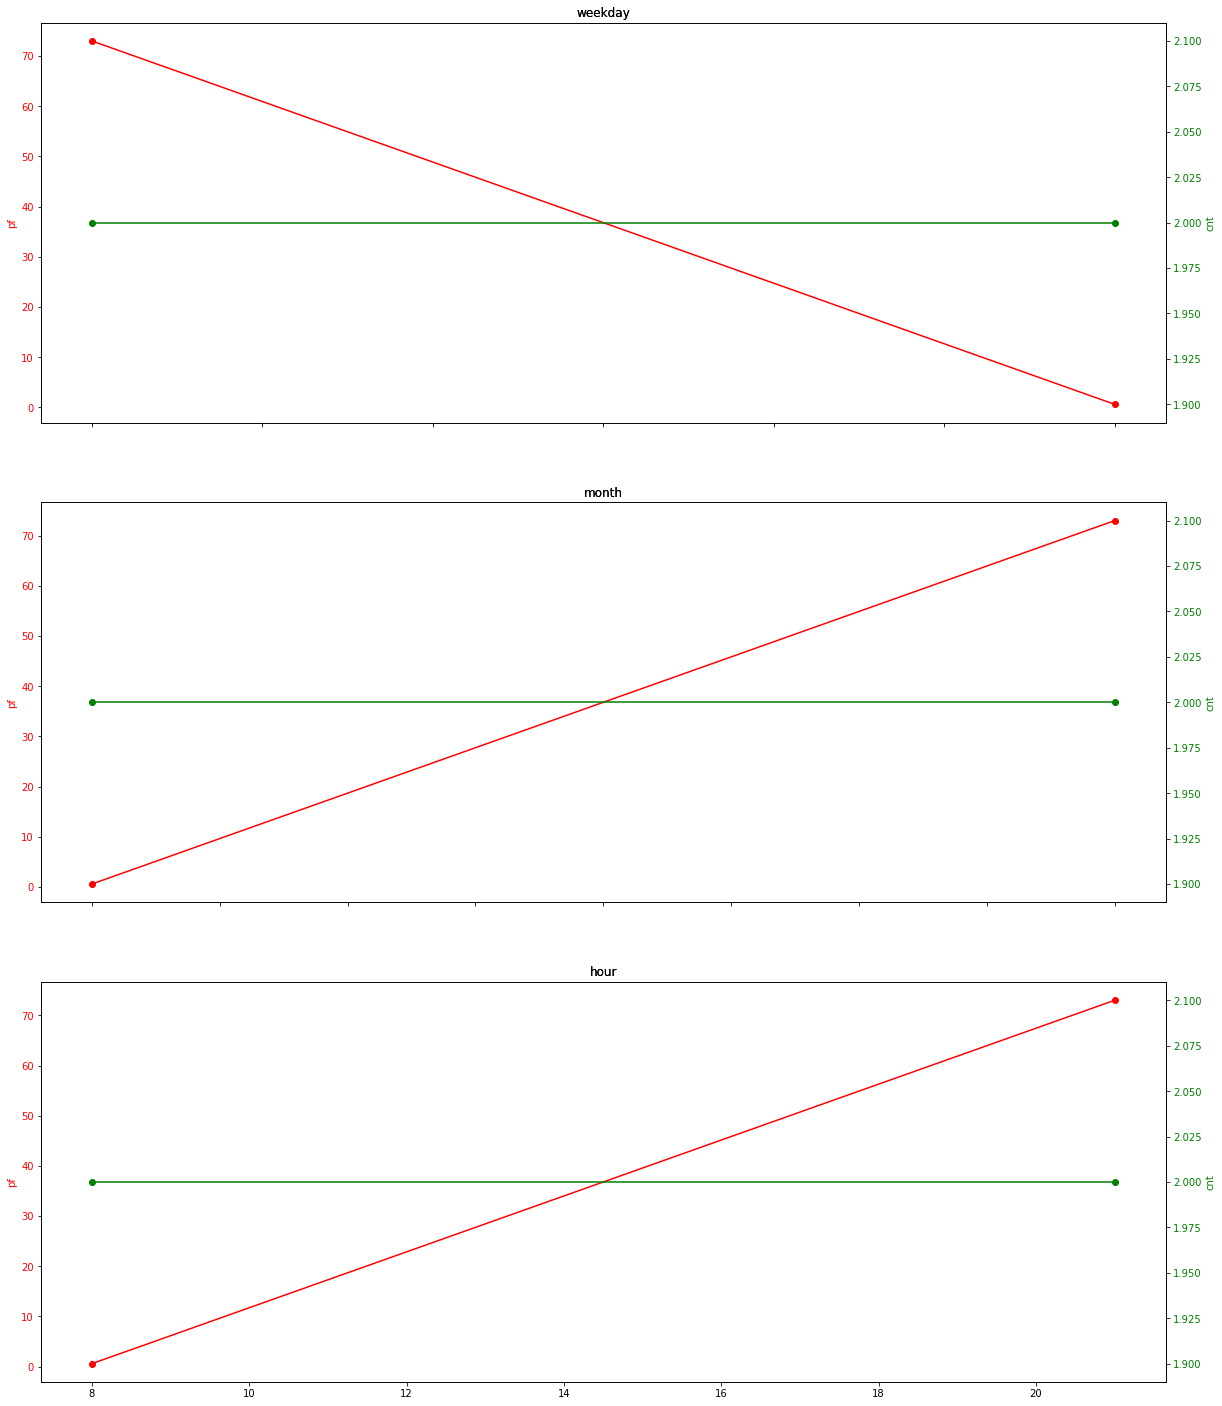

In [22]:
bs.plotSeasonalities()
display(tr.displayTitle('Seasonalities'))

In [23]:
if not simpleRun:    
    bs.loadOpts(root + '/Opt.csv')
    display(tr.displayTitle('Optimization'))
    bs.plotOptimization()
